In [3]:
# Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Validation
from sklearn.model_selection import train_test_split

#
from sklearn.feature_selection import mutual_info_classif

In [16]:
from sklearn.datasets import make_classification, load_breast_cancer

X, y = load_breast_cancer(return_X_y = True, as_frame=True)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# from sklearn.datasets import load_boston

# load data
# boston = load_boston()
# X = pd.DataFrame(boston.data, columns=boston.feature_names)
# X.drop('CHAS', axis=1, inplace=True)
# y = pd.Series(boston.target, name='MEDV')

# # inspect data
# X.head()

In [6]:
# Split into train & test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=11)

# Statistical Tests for Feature Information

## Mutual Information (MI): numerical feature to categorical target

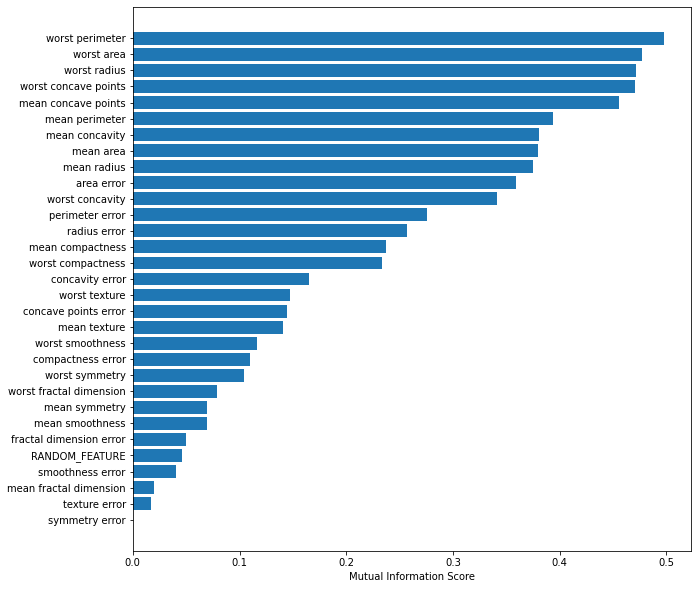

In [10]:
###
data = X_train.copy()
data['RANDOM_FEATURE'] = np.random.randint(1, 5)
target = y_train
###

mi_score = mutual_info_classif(
    data, 
    target, 
    n_neighbors=10,
    random_state=22)

sorted_idx = np.argsort(mi_score)

mi_scoredf = pd.DataFrame(
    mi_score[sorted_idx[::-1]], 
    index=data.columns[sorted_idx[::-1]], 
    columns=['mi_score'])

plt.figure(figsize=(10, 10))

plt.barh(
    data.columns[sorted_idx], 
    mi_score[sorted_idx])
plt.xlabel("Mutual Information Score");

In [ ]:
# example of mutual information feature selection for numerical input data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
 
# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename, header=None)
    # retrieve numpy array
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1]
    return X, y
 
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = load_dataset('pima-indians-diabetes.csv')

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

## Chi-Square Dependence Test: categorical feature to categorical target

In [47]:
#importing all the essential library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split


df = pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv",sep=",")

y = df['Churn']
X = df.drop('Churn', axis=1)
X.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65


In [50]:
# Split into train & test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=11)

In [51]:
X_train.dtypes

customerID           object
gender               object
SeniorCitizen         int64
tenure                int64
ServiceCount          int64
Contract             object
PaperlessBilling     object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [57]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [71]:
cat_features = X_train.select_dtypes(include=['object']).columns
# num_features = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train_cat = X_train[cat_features]
X_train_cat.head()
y_train.head()

3302    Yes
2339    Yes
2759     No
4898    Yes
5543     No
Name: Churn, dtype: object

In [82]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.feature_selection import chi2

In [83]:
X_train_cat_le = MultiColumnLabelEncoder().fit_transform(X_train_cat)

In [84]:
X = X_train_cat_le

chi_scores = chi2(X, y_train)
chi_scores

(array([1.48873493e+03, 4.74957453e-01, 8.85462983e+02, 8.04847360e+01]),
 array([0.00000000e+000, 4.90715306e-001, 1.41912960e-194, 2.92959177e-019]))

<AxesSubplot:>

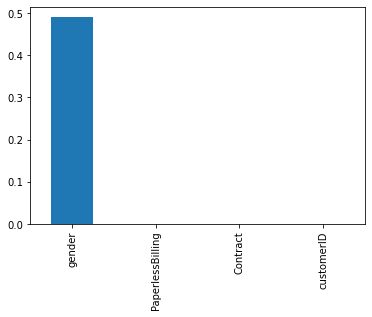

In [85]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

p_values.plot.bar()

## ANOVA: numerical feature to categorical target

In [ ]:
# example of anova f-test feature selection for numerical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

In [ ]:
# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename, header=None)
    # retrieve numpy array
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1]
    return X, y

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = load_dataset('pima-indians-diabetes.csv')

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()